In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [36]:
data = pd.read_csv('../data/cleaned_data.csv')

In [37]:
tv = TfidfVectorizer(max_features=5000, stop_words='english', use_idf=True, norm='l2')

vectorized_data = tv.fit_transform(data['merged_text_columns']).toarray()

In [38]:
vectorized_data.shape

(4890, 5000)

In [39]:
sample_data = vectorized_data[:50]

In [40]:
linkage_matrix = linkage(sample_data, method='average', metric='cosine')

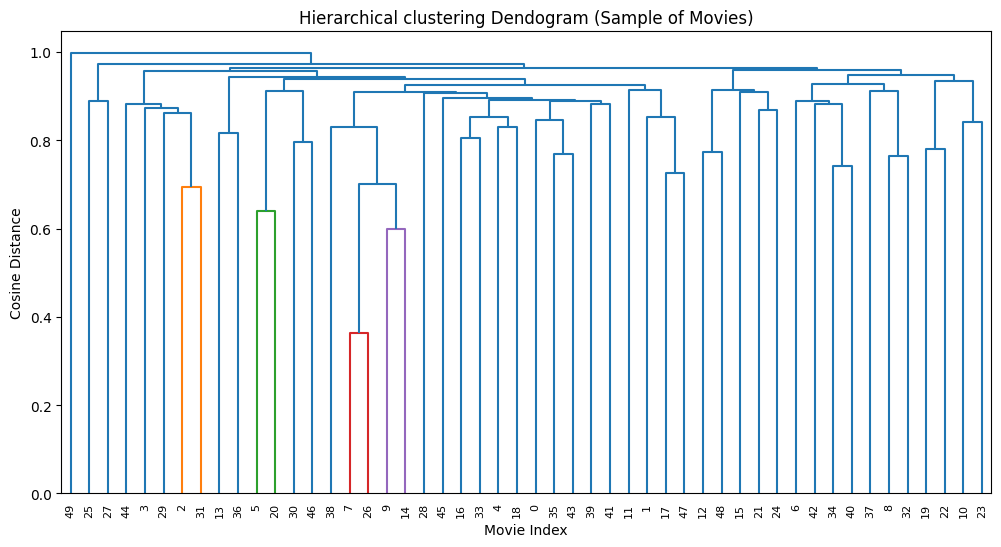

In [41]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical clustering Dendogram (Sample of Movies)")
plt.xlabel("Movie Index")
plt.ylabel("Cosine Distance")
plt.show()

In [42]:
cluster_labels = fcluster(linkage_matrix, t=0.9, criterion='distance')

In [43]:
unique_clusters = np.unique(cluster_labels)
print(f"Number of clusters: {len(unique_clusters)}")

Number of clusters: 19


In [44]:
data_sample = data.iloc[:50].copy()
data_sample['cluster_id'] = cluster_labels

In [45]:
print(data_sample.head())

                                 movie_title  \
0                                    Avatar    
1  Pirates of the Caribbean: At World's End    
2                                   Spectre    
3                     The Dark Knight Rises    
4                               John Carter    

                                 merged_text_columns  cluster_id  
0  avatar future marine native paraplegic Action ...           7  
1  goddess marriage ceremony marriage proposal pi...           9  
2  bomb espionage sequel spy terrorist Action Adv...           2  
3  deception imprisonment lawlessness police offi...           2  
4  alien american civil war male nipple mars prin...           7  


In [46]:
data_sample

,movie_title,merged_text_columns,cluster_id
0,Avatar,avatar future marine native paraplegic Action ...,7
1,Pirates of the Caribbean: At World's End,goddess marriage ceremony marriage proposal pi...,9
2,Spectre,bomb espionage sequel spy terrorist Action Adv...,2
3,The Dark Knight Rises,deception imprisonment lawlessness police offi...,2
4,John Carter,alien american civil war male nipple mars prin...,7
5,Spider-Man 3,sandman spider man symbiote venom villain Acti...,4
6,Tangled,17th century based on fairy tale disney flower...,14
7,Avengers: Age of Ultron,artificial intelligence based on comic book ca...,6
8,Harry Potter and the Half-Blood Prince,blood book love potion professor Adventure Fam...,15
9,Batman v Superman: Dawn of Justice,based on comic book batman sequel to a reboot ...,6


In [47]:
data_sample.to_csv('../data/data_sample.csv', index=False)